# Mortality Rate and the Vital Signs

#### Aim: Develop a model to predict patient mortality rate by analyzing the five most important vital signs of ICU patients.

## Contents
    *Background
        *What are these vital signs?
        *Why choose these vital signs?
    *Data preparation 
    *Exploratory Data Analysis
    *Variable Selection
    *Data Preprocessing
        *Data Visualization
        *Exclusion
    *Data Analysis
    *Data Modelling
        *Discussions
    *Conclusion
    *Contributions
    *References


## Background
We will be predicting and analyzing ICU patient mortality based on the time series data of patient vital signs over the first 48 hours of their stay.
We will select five vital signs out of the 42 that were recorded.
We will organize, analyze, classify and compare the data with Python to find the relationship between vital signs and mortality rate. If there is any relationship, we will then find the regression line of patients' vital signs and mortality rate and combine them to establish a model to predict the mortality rate of patients.

The vital signs being analysed are:
1. Heart Rate
2. The Glasgow Coma Scale (GCS) 
3. Respiration Rate
4. Body Temperature
5. Albumin

### What are these vital signs?
1. Heart Rate refers to the number of heart beats per minute in a quiet state. The normal range is 60-100 beats per minute. Heart rate is directly related to age, gender and other physiological factors. (Fuster & Wayne & O'Rouke 2001) Heart rate is one of the most easily detected physiological states.


2. The Glasgow Coma Scale (GCS) is a measure of a patient's awareness and responsiveness to their surroundings. It is meant to gauge the level of consciousness after a brain injury. GCS scores are obtained through a series of tests on 3 parameters: eye response, verbal response and motor response. The sum of the GCS metrics is also often used as it provides a good summary of the overall severity of the trauma. The lowest possible score in each parameter is 1, so the minimum overall GCS is 3. Patients with this score are not responsive to their surroundings at all. The maximum GCS is 15, which corresponds to a normal waking state of consciousness.


3. Respiration Rate also known as RR is defined as the number of breaths per minute calculated over one minute . A normal range for respiratory rate is 12-25 breaths per minute (brpm). A respiratory rate below 12 or above 25 breaths per minute while resting may indicate an underlying health problem.Respiratory rate is a sign that there is movement of air in and out of the lungs.


4. Body Temperature is a measurement of internal heat of a human body.The average human body temperature is around 36.5-37°C. The body is very good at keeping its temperature within a safe range, even when temperatures outside the body change a lot. (Body Temperature,2020)


5. Albumin is the serum protein that can be found in human blood.It accounts for about half of all serum proteins and is the most abundant protein in human plasma.It is a monomer which is produced by liver and it is soluble in water(Albumin Blood Test, n.d.).Albumin provides protein nutrition for various tissues and promotes the repair and regeneration of liver cells. Albumin levels are also often used to assist in the diagnosis and treatment of patients with liver disease.


### Why choose these vital signs？
1. Heart rate: More and more people are proving that there is a certain relationship between heart rate and the survival rate of patients. (Reunanen& Karjalainen& Ristola et.al 2000) In several epidemiological studies, it was found that increased heart rate is directly related to hypertension (Macedo& Kosmidou& Crowley et.al 2018), and physical activity and Lung function is inversely proportional. (Rhoads& Goleva& Beierwaltes et.al 2017) Cardiopulmonary function is a key factor in patient survival in the clinic, so it can be considered that heart rate will affect the survival rate of patients. (Seccareccia& Pannozzo& Dima et.al 2001)


2. GCS: Traumatic brain injury is one of the most common causes of disability and death in adults. It is usually associated with car accidents, falls, physical assaults and sports related accidents. Brain damage occurs in two stages: primary injury, which is the direct physical result of the impact, as well as secondary injury, which is caused by the runaway biochemical reactions from destroyed nerve cells. Secondary injury manifests itself after a severe enough primary injury to any region of the brain and can result in cascading cell death which spreads to the rest of the organ. Therefore, a patient who has just been admitted to the ICU may be quite responsive and have a high GCS score, but as the deadly delayed effects of secondary injury take hold, a worsening GCS indicates a high chance of mortality. A GCS that improves over time indicates that the patient is recovering and that survival is likely. 


3. Respiration Rate: is one of the vital signs therefore, it is important to measure RR in patients. Changes in respiratory rate usually occur well before the other vital sign changes e.g. blood pressure in this regard, monitoring the respiratory rate of patients critical or otherwise, could lead to early detection of clinical deterioration (Dix, 2018). Monitoring the respiratory rate of an ICU patient ventilated or otherwise, is of paramount importance as it checks the patients’ readiness for a less invasive positive pressure ventilation. Furthermore, it helps reduce complications associated with ventilators, improves the patient-ventilator synchrony and helps provide signs on the patients’ condition. (Eric Kipnis, 2012) Therefore, ICU patients require continuous monitoring of the vital signs to help identify clinical deterioration well before any adverse events occur.


4. Body Temperature: maintaining a constant temperature is very important to the human body so that the body can function properly. In particular, enzymes in a body's cells must have the correct temperature to be able to catalyse chemical reactions. In the human body high temperatures can cause dehydration, heat stroke and death if untreated and low temperatures can cause hypothermia and death if untreated. (Maintaining a Constant Body Temperature , 2021)


5. Albumin: It is closely related to human health as it maintains the blood osmotic pressure, the plasma colloid osmotic pressure in the blood system, regulates the hydrodynamic balance between blood vessels,and increases blood circulation.
Hypoalbuminemia often occurs in patients in intensive care as a result of serious injury or illness, and contributes to the development of life-threatening complications, including pulmonary edema, delayed wound healing, blood clotting, and multiple organ dysfunction( (VetFolio, n.d.).Therefore,albumin content is an important indicator to analyze the mortality of ICU patients.


## Data Preparation


Import the libraries and the data. The unique Record ID is used as the DataFrame index, for facilitating data manipulation. This is achived by setting the ‘index_col’ parameter to the name of the index column. 
Make a new dataframe from the old one using call df[col] with df as the DataFrame from the previous step, and col as the column names to read, then rename using df.rename()

In [124]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from scipy import integrate
import warnings


plt.style.use('ggplot')

In [6]:
df = pd.read_csv('ProjectPreprocessed.ICU.data.csv',index_col='RecordID')
df

,Age,Gender,Height,ICUType2,ICUType3,ICUType4,Mean_Weight.x,Mean_GCS.x,Mean_HR.x,Mean_NIDiasABP.x,...,Max_ALT.y,Max_AST.y,Max_Bilirubin.y,Max_Lactate.y,Max_Cholesterol.y,Max_TroponinI.y,Max_TroponinT.y,SAPS.I,SOFA,In.hospital_death
RecordID,,,,,,,,,,,,,,,,,,,,,
132543,68,1.0,180.300000,0,1,0,84.600000,14.888889,72.971429,65.970588,...,12.000000,15.000000,0.200000,2.395461,156.842105,7.132683,1.114629,7,1,0
132545,88,0.0,169.787227,0,1,0,83.054136,15.000000,79.520000,49.333333,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,17,2,0
132547,64,1.0,180.300000,0,0,0,114.000000,8.333333,81.318182,70.500000,...,60.000000,162.000000,0.400000,2.395461,212.000000,1.300000,1.114629,14,11,0
132551,78,0.0,162.600000,0,1,0,48.400000,13.250000,78.125000,28.000000,...,46.000000,82.000000,0.300000,2.300000,156.842105,3.500000,1.114629,19,8,1
132554,64,0.0,169.787227,0,1,0,60.700000,15.000000,129.363636,65.454545,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142661,89,1.0,177.800000,0,0,1,64.000000,11.214286,86.260870,60.041667,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,6,4,0
142662,86,1.0,162.600000,0,1,0,53.000000,13.000000,85.517241,40.576271,...,28.000000,35.000000,0.900000,2.395461,156.842105,7.132683,1.114629,19,8,0
142664,51,0.0,169.787227,0,0,1,75.000000,9.909091,91.147059,57.213827,...,189.169186,260.323666,1.979557,2.395461,156.842105,7.132683,1.114629,13,8,0


In [86]:
du=df[['Mean_RespRate.x','Mean_RespRate.y','Mean_HR.x','Mean_HR.y','Mean_Albumin.x','Mean_Albumin.y','Mean_GCS.x','Mean_GCS.y','Mean_Temp.x','Mean_Temp.y','In.hospital_death']]
du
dx = du.rename(columns = {'Mean_RespRate.x': 'Respiration Rate in 24h',
                          'Mean_RespRate.y': 'Respiration Rate in 48h',
                          'Mean_HR.x': 'Heart Rate in 24h',
                          'Mean_HR.y': 'Heart Rate in 48h',
                          'Mean_Albumin.x': 'Albumin in 24h',
                          'Mean_Albumin.y': 'Albumin in 48h',
                          'Mean_GCS.x': 'GCS in 24h',
                          'Mean_GCS.y': 'GCS in 48h',
                          'Mean_Temp.x': 'Body temp in 24h',
                          'Mean_Temp.y': 'Body temp in 48h',
                          'In.hospital_death':'In.hospital_death'})
dx

,Respiration Rate in 24h,Respiration Rate in 48h,Heart Rate in 24h,Heart Rate in 48h,Albumin in 24h,Albumin in 48h,GCS in 24h,GCS in 48h,Body temp in 24h,Body temp in 48h,In.hospital_death
RecordID,,,,,,,,,,,
132543,15.818182,15.000000,72.971429,68.200000,4.400000,4.400000,14.888889,15.000000,36.214286,36.233333,0
132545,19.720000,18.565217,79.520000,70.000000,3.300000,3.300000,15.000000,15.000000,37.000000,36.640000,0
132547,19.666415,19.648290,81.318182,94.880000,2.983815,2.955651,8.333333,8.888889,37.100000,37.816667,0
132551,19.666415,19.648290,78.125000,65.341463,1.900000,1.900000,13.250000,9.600000,37.133333,36.980000,1
132554,35.409091,34.500000,129.363636,125.291667,2.983815,2.955651,15.000000,15.000000,37.040000,36.760000,0
...,...,...,...,...,...,...,...,...,...,...,...
142661,19.565217,19.555556,86.260870,85.833333,3.600000,3.600000,11.214286,10.777778,37.000000,36.825000,0
142662,19.666415,19.648290,85.517241,77.869565,2.600000,2.600000,13.000000,14.666667,37.166667,36.716667,0
142664,19.666415,19.648290,91.147059,102.458333,2.983815,2.955651,9.909091,10.000000,36.812500,37.250000,0


From analysing the data, one can see that the Albumin levels in 24 hours and in 48 hours are the same so we will drop the column 'Albumin in 24h' using the df.drop() function.

In [87]:
dt=dx.drop(['Albumin in 24h'], axis = 1)
dt

,Respiration Rate in 24h,Respiration Rate in 48h,Heart Rate in 24h,Heart Rate in 48h,Albumin in 48h,GCS in 24h,GCS in 48h,Body temp in 24h,Body temp in 48h,In.hospital_death
RecordID,,,,,,,,,,
132543,15.818182,15.000000,72.971429,68.200000,4.400000,14.888889,15.000000,36.214286,36.233333,0
132545,19.720000,18.565217,79.520000,70.000000,3.300000,15.000000,15.000000,37.000000,36.640000,0
132547,19.666415,19.648290,81.318182,94.880000,2.955651,8.333333,8.888889,37.100000,37.816667,0
132551,19.666415,19.648290,78.125000,65.341463,1.900000,13.250000,9.600000,37.133333,36.980000,1
132554,35.409091,34.500000,129.363636,125.291667,2.955651,15.000000,15.000000,37.040000,36.760000,0
...,...,...,...,...,...,...,...,...,...,...
142661,19.565217,19.555556,86.260870,85.833333,3.600000,11.214286,10.777778,37.000000,36.825000,0
142662,19.666415,19.648290,85.517241,77.869565,2.600000,13.000000,14.666667,37.166667,36.716667,0
142664,19.666415,19.648290,91.147059,102.458333,2.955651,9.909091,10.000000,36.812500,37.250000,0


## Exploratory Data Analysis

First we preview the first few rows of the new dataframe, in order to see the information regarding patient demographics: mortality, mean blood pressure, temperature, respiratory rate; lab tests: pH; scores: glasgow coma scale.

In [18]:
dt.head()

,Respiration Rate in 24h,Respiration Rate in 48h,Heart Rate in 24h,Heart Rate in 48h,Albumin in 48h,GCS in 24h,GCS in 48h,Body temp in 24h,Body temp in 48h,Mortality
RecordID,,,,,,,,,,
132543,15.818182,15.000000,72.971429,68.200000,4.400000,14.888889,15.000000,36.214286,36.233333,0
132545,19.720000,18.565217,79.520000,70.000000,3.300000,15.000000,15.000000,37.000000,36.640000,0
132547,19.666415,19.648290,81.318182,94.880000,2.955651,8.333333,8.888889,37.100000,37.816667,0
132551,19.666415,19.648290,78.125000,65.341463,1.900000,13.250000,9.600000,37.133333,36.980000,1
132554,35.409091,34.500000,129.363636,125.291667,2.955651,15.000000,15.000000,37.040000,36.760000,0


In order to understand how 'clean' the data is we need to see if there is any missing data and get a summary of the statistics.
We can print the number of ICU stays by calculating the length of the unique indexes, number of missing data using the ‘info’ function and summary statistics using the ‘describe’ function:

In [89]:
print('Number of patients admitted to the ICU: '+str(len(dt.index.unique())))
print('Number of survivors:' +str(len(dt[dt['In.hospital_death']==0].index.unique())))
print('Number of non-survivors: ' +str(len(dt[dt['In.hospital_death']==1].index.unique())))
print('Mortality Rate: ' +str(round(100*len(dt[dt['In.hospital_death']==1].index.unique()) /
                              len(dt.index.unique()),1)) + '%')
print()
display.display(dt.info(null_counts=1))
display.display(dt.describe())

Number of patients admitted to the ICU: 1474
Number of survivors:920
Number of non-survivors: 554
Mortality Rate: 37.6%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 132543 to 142671
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Respiration Rate in 24h  1474 non-null   float64
 1   Respiration Rate in 48h  1474 non-null   float64
 2   Heart Rate in 24h        1474 non-null   float64
 3   Heart Rate in 48h        1474 non-null   float64
 4   Albumin in 48h           1474 non-null   float64
 5   GCS in 24h               1474 non-null   float64
 6   GCS in 48h               1474 non-null   float64
 7   Body temp in 24h         1474 non-null   float64
 8   Body temp in 48h         1474 non-null   float64
 9   In.hospital_death        1474 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 126.7 KB


None

,Respiration Rate in 24h,Respiration Rate in 48h,Heart Rate in 24h,Heart Rate in 48h,Albumin in 48h,GCS in 24h,GCS in 48h,Body temp in 24h,Body temp in 48h,In.hospital_death
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,19.858047,19.800376,87.107600,86.707523,2.896808,10.832169,11.296425,36.795315,36.891974,0.375848
std,2.269311,2.206872,16.320184,15.810176,0.422085,3.753129,3.768736,0.943391,0.862900,0.484505
min,10.777778,11.521739,45.814815,46.038462,1.100000,3.000000,3.000000,25.780000,25.920000,0.000000
25%,19.666415,19.648290,75.393771,75.591912,2.900000,8.000000,8.333333,36.400000,36.500000,0.000000
50%,19.666415,19.648290,86.273292,85.914855,2.955651,11.000000,12.250000,36.811655,36.900000,0.000000
75%,19.666415,19.648290,98.385753,96.940705,2.955651,14.800000,15.000000,37.283991,37.332143,1.000000
max,39.413793,39.896552,138.947368,141.640000,4.500000,15.000000,15.000000,39.823077,39.850000,1.000000


The dataset consists of 1474 unique ICU stays and 1474 observations. All the columns with the exception of ‘Mortality’ have missing information. Looking at the maximum and minimum values it is possible to spot the presence of outliers (e.g. max Average Respiration Rate). Both missing data and outliers are very common in ICU databases and need to be taken into consideration before applying ML algorithms.

## Variable Selection

We know the how much data is missing from every column however,we don't know how much is missing at patient level. In order to find out, we aggreagated the data by Record ID and observed the number of non-null values using the 'groupby' function and the 'mean' operator. This will give an indication of how many patients(RecordID's) have at least one observtion for each variable in the ICU.
Please note that one patient might have multiple ICU stays. Therefore, for the sake of simplicity, we will consider every ICU stay as an independent sample.

In [90]:
print(dt.groupby(['RecordID']).mean().info(null_counts=1))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 132543 to 142671
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Respiration Rate in 24h  1474 non-null   float64
 1   Respiration Rate in 48h  1474 non-null   float64
 2   Heart Rate in 24h        1474 non-null   float64
 3   Heart Rate in 48h        1474 non-null   float64
 4   Albumin in 48h           1474 non-null   float64
 5   GCS in 24h               1474 non-null   float64
 6   GCS in 48h               1474 non-null   float64
 7   Body temp in 24h         1474 non-null   float64
 8   Body temp in 48h         1474 non-null   float64
 9   In.hospital_death        1474 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 126.7 KB
None


We want to create, is a colored map that shows the strength of the correlation between every independent variable that we want to include in our model and the dependent variable.
We achieve this by using df.corr(), vmin and vmax to set the range of values (-1,1) and using sort_values() to plot a heatmap to show how the variables correlate to mortality.
The following code returns the correlation of all features with ‘Mortality’, a single, dependent variable, sorted by ‘Mortality’ in a descending manner.

In [91]:
dt.corr()[['In.hospital_death']].sort_values(by='In.hospital_death', ascending=False)

,In.hospital_death
In.hospital_death,1.000000
Heart Rate in 48h,0.135712
Heart Rate in 24h,0.134482
Respiration Rate in 24h,0.037439
Body temp in 48h,0.008901
Respiration Rate in 48h,0.004872
Body temp in 24h,-0.003274
Albumin in 48h,-0.122993
GCS in 24h,-0.242397
GCS in 48h,-0.386052


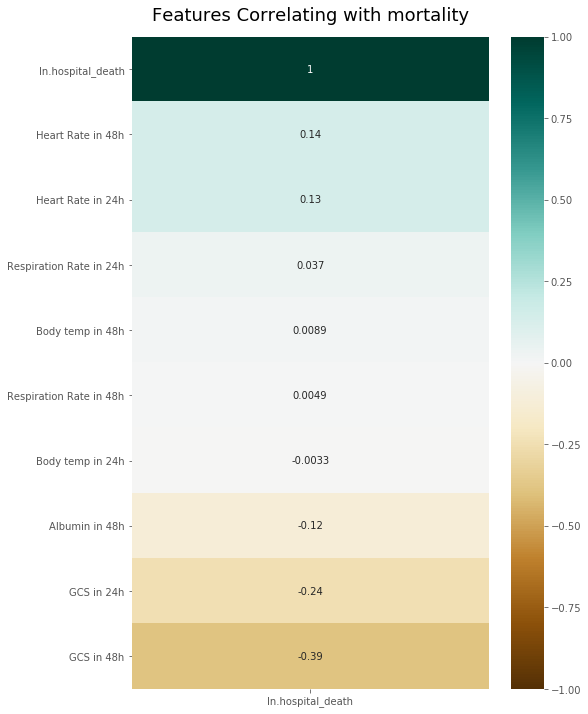

In [92]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dt.corr()[['In.hospital_death']].sort_values(by='In.hospital_death', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with mortality', fontdict={'fontsize':18}, pad=16);

The only variables correlated to Mortality are GCS AND HR.GCS is the only variable that can be used to build a model as it is the only variable that is 'strongly'(>3) correlated to mortality therefore, it can be used to predict mortality.

In [102]:
variables=[dt.columns]
variables_mort=variables.copy()
variables_mort.append('In.hospital_death')

## Data Preprocessing

### Data Visualization
As aforementioned, this is a big dataset so one needs to check for outliers and remove them if there are any. 
However, we first need to plot the data to see if there are any outliers.We achieved this by using the ‘seaborn’ library and the ‘boxplot’ function to create 2 boxplots for every variable.

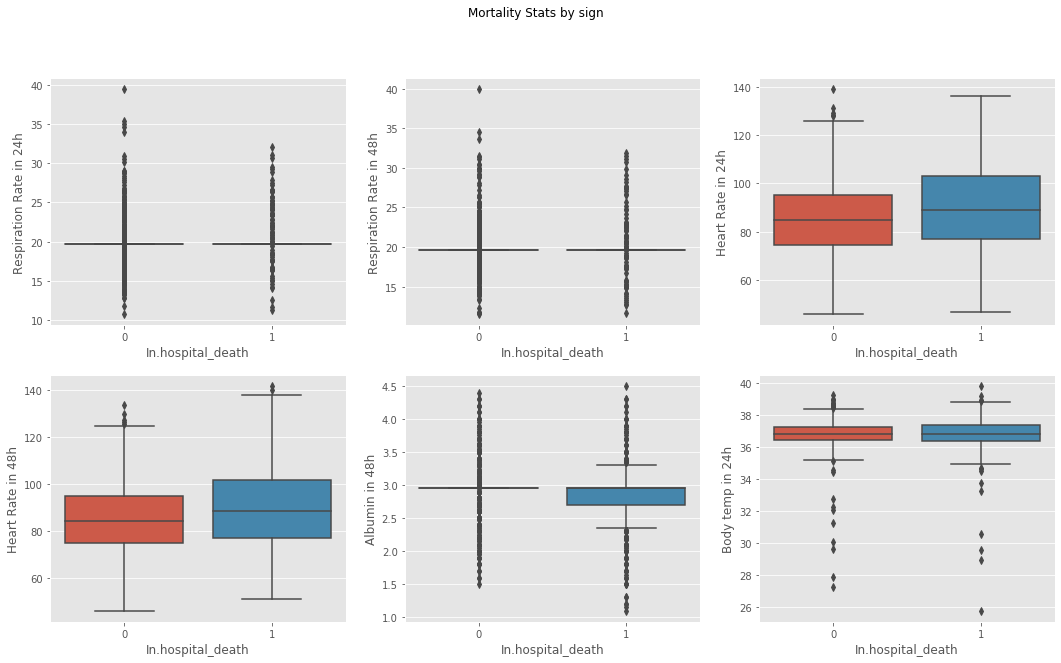

In [94]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Mortality Stats by sign')

sns.boxplot(ax=axes[0, 0], data=dt, x='In.hospital_death', y='Respiration Rate in 24h')
sns.boxplot(ax=axes[0, 1], data=dt, x='In.hospital_death', y='Respiration Rate in 48h')
sns.boxplot(ax=axes[0, 2], data=dt, x='In.hospital_death', y='Heart Rate in 24h')
sns.boxplot(ax=axes[1, 0], data=dt, x='In.hospital_death', y='Heart Rate in 48h')
sns.boxplot(ax=axes[1, 1], data=dt, x='In.hospital_death', y='Albumin in 48h')
sns.boxplot(ax=axes[1, 2], data=dt, x='In.hospital_death', y='Body temp in 24h')

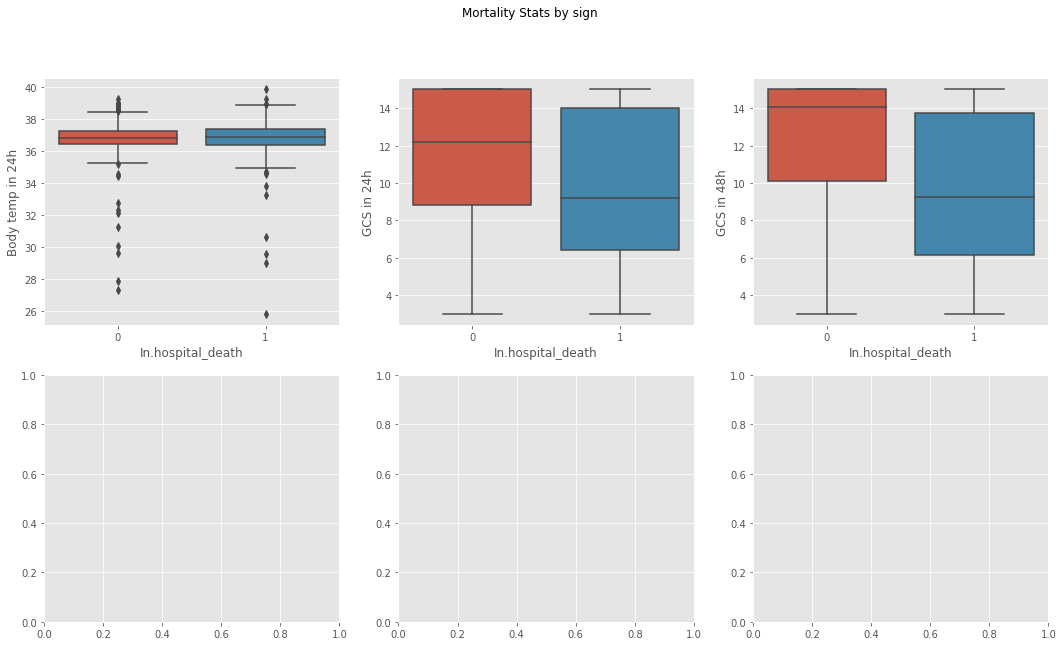

In [93]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Mortality Stats by sign')

sns.boxplot(ax=axes[0, 0], data=dt, x='In.hospital_death', y='Body temp in 24h')
sns.boxplot(ax=axes[0, 1], data=dt, x='In.hospital_death', y='GCS in 24h')
sns.boxplot(ax=axes[0, 2], data=dt, x='In.hospital_death', y='GCS in 48h');

In some cases, the outliers are so far from the norm that it is not possible to visualize the distribution of data (minimum, first quartile, median, third quartile, maximum) using boxplots.

### Exclusion
As seen there are no outliers therefore, no observations were removed.

In [97]:
nulls_before = dt.isnull().sum().sum()

dt.loc[dt['Respiration Rate in 24h']>300, 'Respiration Rate in 24h'] = np.nan
dt.loc[dt['Respiration Rate in 48h']>300, 'Respiration Rate in 48h'] = np.nan
dt.loc[dt['Heart Rate in 24h']>400, 'Heart Rate in 24h'] = np.nan
dt.loc[dt['Heart Rate in 48h']>400, 'Heart Rate in 48h'] = np.nan
dt.loc[dt['Body temp in 24h']>50, 'Body Temp in 24h'] = np.nan
dt.loc[dt['Body temp in 48h']>50, 'Body Temp in 48h'] = np.nan
dt.loc[dt['Albumin in 48h']>7.8, 'Respiration Rate in 48h'] = np.nan


nulls_now = dt.isnull().sum().sum()
print('Number of observation removed: '+ str(nulls_now- nulls_before))
print('Observation corresponding to outliers: ' + str(round((nulls_now - nulls_before)*100/dt.shape[0],2)) + '%')

Number of observation removed: 0
Observation corresponding to outliers: 0.0%


## Data Analysis
From the pairplot below one cannot visualize trends or come up with a conclusion. Therefore,We decided to visualize the data indvidually. This means that we plotted different kinds of graphs for the different vital signs being analysed because not all graphs will work for all the vital signs.

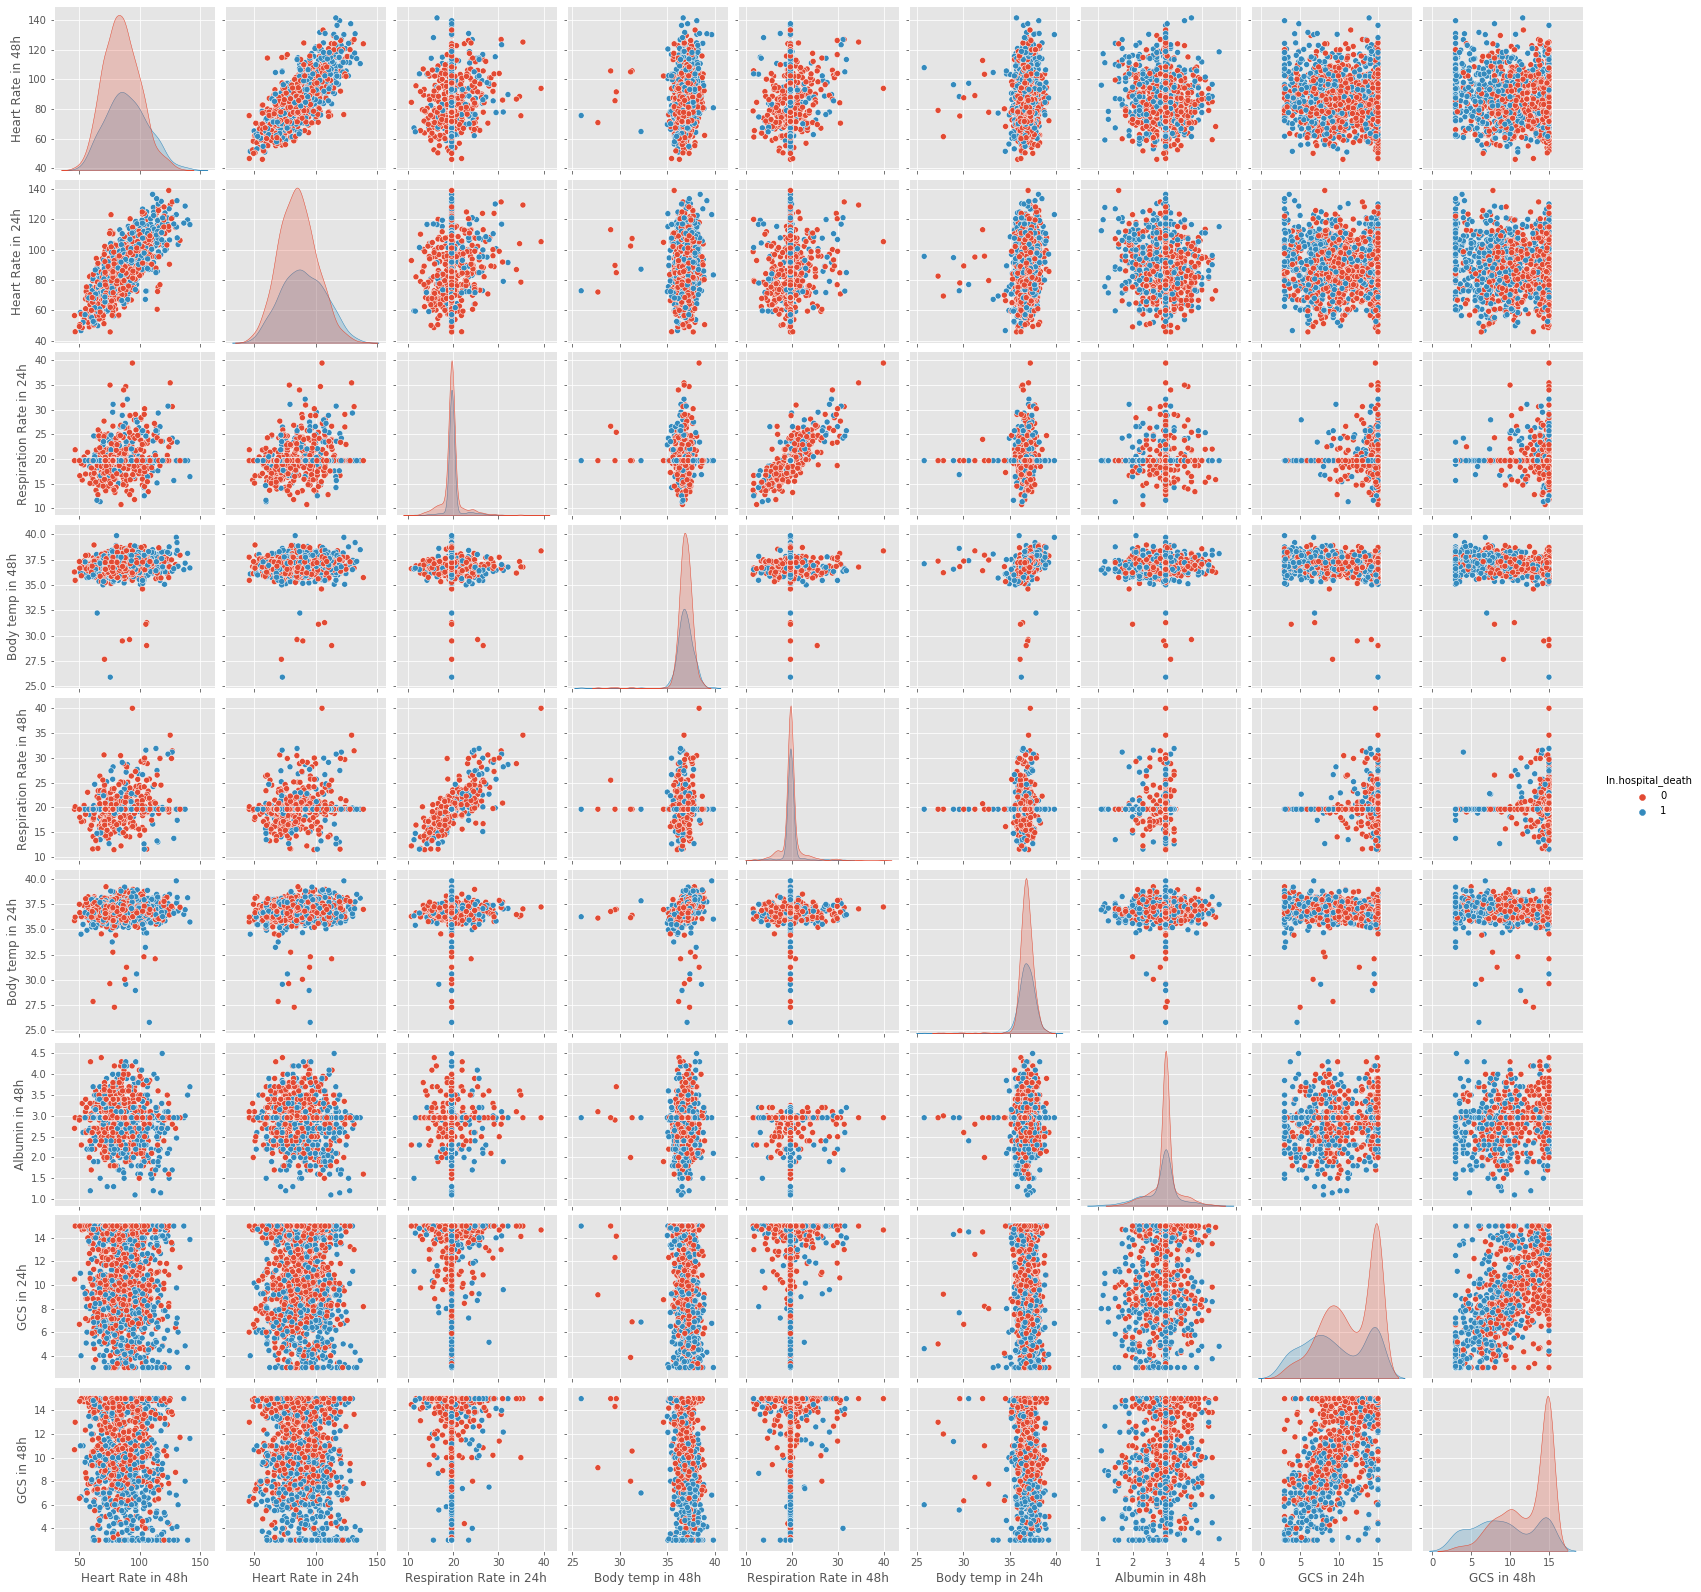

In [96]:
sns.pairplot(vars = ['Heart Rate in 48h','Heart Rate in 24h',
                     'Respiration Rate in 24h','Body temp in 48h',
                     'Respiration Rate in 48h','Body temp in 24h',
                     'Albumin in 48h','GCS in 24h','GCS in 48h'],
             data = dt,hue = 'In.hospital_death')

### 1. Heart Rate
We decided to use a histogram and a boxplot as they made the data easy to analyse. Furthermore, histograms can display a large amount of data and frequency. 
We achieved this by using the sns.hist() function and the sns.boxplot() funtion.

For the histogram we can see that most patients' heart rates are between 80 and 90.

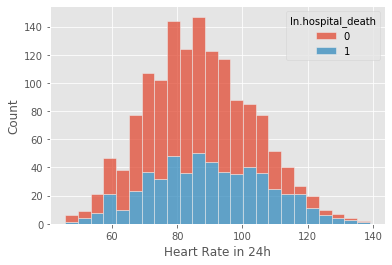

In [108]:
sns.histplot(data=dt, x='Heart Rate in 24h', hue='In.hospital_death',multiple='stack')

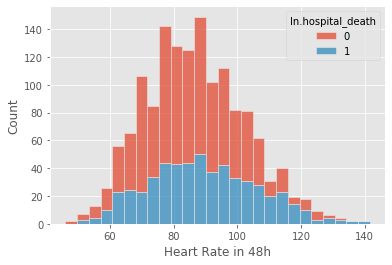

In [109]:
sns.histplot(data=dt, x='Heart Rate in 48h', hue='In.hospital_death',multiple='stack')

By comparing the 2 box plots, we can find that the heart rate of the dead patients is higher in both the 48h plot and the 24h plot

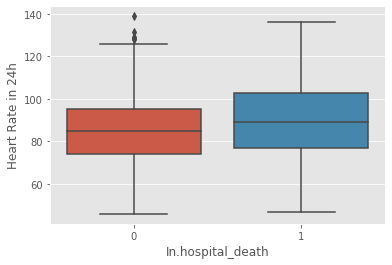

In [111]:
sns.boxplot(data=dt,x='In.hospital_death',y='Heart Rate in 24h')

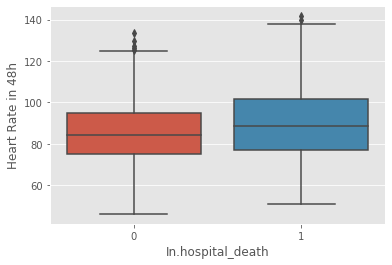

In [110]:
sns.boxplot(data=dt,x='In.hospital_death',y='Heart Rate in 48h')

poly1d([-0.00491553,  0.99699887])

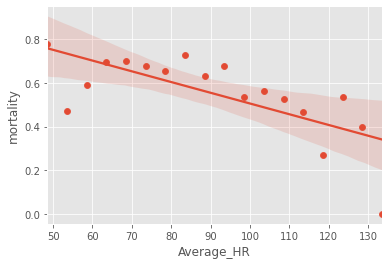

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from scipy import integrate
import warnings
plt.style.use('ggplot')
df = pd.read_csv('ProjectPreprocessed.ICU.data.csv',index_col='RecordID')
du=df[['Mean_RespRate.x','Mean_RespRate.y','Mean_HR.x','Mean_HR.y','Mean_Albumin.x','Mean_Albumin.y','Mean_GCS.x','Mean_GCS.y','Mean_Temp.x','Mean_Temp.y','In.hospital_death']]
dx = du.rename(columns = {'Mean_RespRate.x': 'Respiration Rate in 24h',
                          'Mean_RespRate.y': 'Respiration Rate in 48h',
                          'Mean_HR.x': 'Heart Rate in 24h',
                          'Mean_HR.y': 'Heart Rate in 48h',
                          'Mean_Albumin.x': 'Albumin in 24h',
                          'Mean_Albumin.y': 'Albumin in 48h',
                          'Mean_GCS.x': 'GCS in 24h',
                          'Mean_GCS.y': 'GCS in 48h',
                          'Mean_Temp.x': 'Body temp in 24h',
                          'Mean_Temp.y': 'Body temp in 48h',
                          'In.hospital_death':'In.hospital_death'})
dt=dx.drop(['Albumin in 24h'], axis = 1)
dt1=dt.pivot_table(index='RecordID', values=['Heart Rate in 24h',
                'In.hospital_death']).round()
dt1['Heart Rate in 24h']=dt1['Heart Rate in 24h'].astype("float32")
dt1['cut']=pd.cut(dt1['Heart Rate in 24h'],bins=[i for i in range(int(dt1['Heart Rate in 24h'].min())
                                                                  ,int(dt1['Heart Rate in 24h']
                                                                 .max()),5)])
totle_count=pd.DataFrame(dt1.groupby('cut')['In.hospital_death'].count())
totle_count.columns=['In.hospital_death_total']
totle_1_count=pd.DataFrame(dt1.groupby('cut')['In.hospital_death'].sum())
totle_1_count.columns=['In.hospital_death_total_1']
result=pd.concat([totle_count,totle_1_count],axis=1)
result['In.hospital_death_total_0']=result['In.hospital_death_total']-result['In.hospital_death_total_1']
result=result[result['In.hospital_death_total']>0].reset_index()
result['mortality']=result['In.hospital_death_total_0']/result['In.hospital_death_total']
result['Average_HR']=result['cut'].map(lambda x:str(str(x)).split(',')[-1].split(']')[0])
result['Average_HR']=result['Average_HR'].astype('float32')-2.5

sns.scatterplot(data=result, x='Average_HR', y='mortality')
sns.regplot(data=result, x='Average_HR', y='mortality');
p1 = np.poly1d(np.polyfit(result['Average_HR'], result['mortality'],1))
p1

### 2. GCS


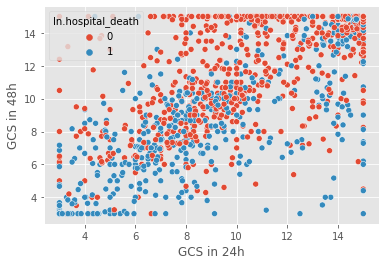

In [145]:
sns.scatterplot(x='GCS in 24h', y='GCS in 48h', hue='In.hospital_death', data=dt); 

poly1d([0.03793316, 0.25232317])

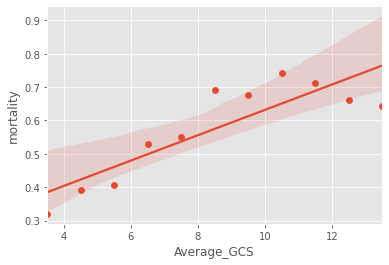

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from scipy import integrate
import warnings
plt.style.use('ggplot')
df = pd.read_csv('ProjectPreprocessed.ICU.data.csv',index_col='RecordID')
du=df[['Mean_RespRate.x','Mean_RespRate.y','Mean_HR.x','Mean_HR.y','Mean_Albumin.x','Mean_Albumin.y','Mean_GCS.x','Mean_GCS.y','Mean_Temp.x','Mean_Temp.y','In.hospital_death']]
dx = du.rename(columns = {'Mean_RespRate.x': 'Respiration Rate in 24h',
                          'Mean_RespRate.y': 'Respiration Rate in 48h',
                          'Mean_HR.x': 'Heart Rate in 24h',
                          'Mean_HR.y': 'Heart Rate in 48h',
                          'Mean_Albumin.x': 'Albumin in 24h',
                          'Mean_Albumin.y': 'Albumin in 48h',
                          'Mean_GCS.x': 'GCS in 24h',
                          'Mean_GCS.y': 'GCS in 48h',
                          'Mean_Temp.x': 'Body temp in 24h',
                          'Mean_Temp.y': 'Body temp in 48h',
                          'In.hospital_death':'In.hospital_death'})
dt=dx.drop(['Albumin in 24h'], axis = 1)
dt1=dt.pivot_table(index='RecordID', values=['GCS in 24h',
                'In.hospital_death']).round()
dt1['GCS in 24h']=dt1['GCS in 24h'].astype("float32")
dt1['cut']=pd.cut(dt1['GCS in 24h'],bins=[i for i in range(int(dt1['GCS in 24h'].min())
                                                                  ,int(dt1['GCS in 24h']
                                                                 .max()),1)])
totle_count=pd.DataFrame(dt1.groupby('cut')['In.hospital_death'].count())
totle_count.columns=['In.hospital_death_total']
totle_1_count=pd.DataFrame(dt1.groupby('cut')['In.hospital_death'].sum())
totle_1_count.columns=['In.hospital_death_total_1']
result=pd.concat([totle_count,totle_1_count],axis=1)
result['In.hospital_death_total_0']=result['In.hospital_death_total']-result['In.hospital_death_total_1']
result=result[result['In.hospital_death_total']>0].reset_index()
result['mortality']=result['In.hospital_death_total_0']/result['In.hospital_death_total']
result['Average_GCS']=result['cut'].map(lambda x:str(str(x)).split(',')[-1].split(']')[0])
result['Average_GCS']=result['Average_GCS'].astype('float32')-0.5

sns.scatterplot(data=result, x='Average_GCS', y='mortality')
sns.regplot(data=result, x='Average_GCS', y='mortality');
p1 = np.poly1d(np.polyfit(result['Average_GCS'], result['mortality'],1))
p1

### 3. Respiration Rate
We decided to use a scatterplot, a line plot and a boxplot(combined with the stripplot)

We decided to use a scatter graph because one is able to tell a distinct relationship between 2 variables in a scatterplot. I achieved this by using sns.scatterplot and using the function hue to distinguish dead or alive.
The scatter graph below shows that abnormally low/high  RR increases mortality risk.

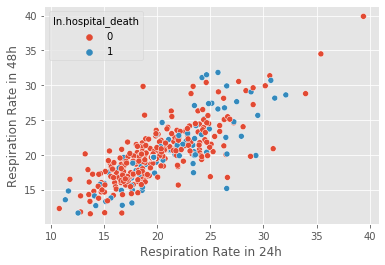

In [98]:
sns.scatterplot(x='Respiration Rate in 24h', y='Respiration Rate in 48h', hue='In.hospital_death', data=dt); 

Line charts help to visualize data in a compact and precise format which makes it easy to rapidly scan information in order to understand trends.
This lineplot shows that the respiratory rate is lower in the survival group (1), slowly increasing over time; it steady around 20 in the non-survival group(0);

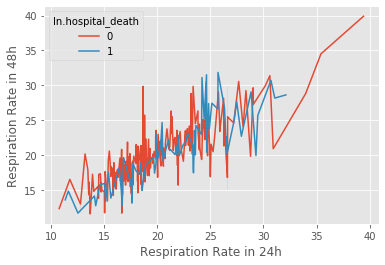

In [99]:
sns.lineplot(data=dt, x='Respiration Rate in 24h', y='Respiration Rate in 48h', hue="In.hospital_death")

I used both stripplot and boxplot because the ‘stripplot’ function allows to visualize the underlying distribution and the number of observations. Setting x = ‘mortality’ shows the boxplots partitioned by outcome.
The graphs below show that less people survived during the 48h period. The mortality risk is highest around 15-20 brpm.

Text(0.5, 1.0, 'Box plot of Respiration Rate in 24h and Mortality rate')

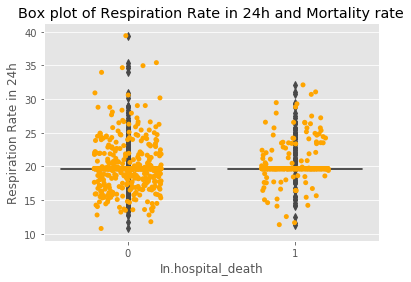

In [100]:
ax = sns.boxplot(x='In.hospital_death', y='Respiration Rate in 24h',data=dt)
ax = sns.stripplot(x='In.hospital_death', y='Respiration Rate in 24h', data=dt, color="orange", jitter=0.2)
plt.title('Box plot of Respiration Rate in 24h and Mortality rate')

Text(0.5, 1.0, 'Box plot of Respiration Rate in 48h and Mortality rate')

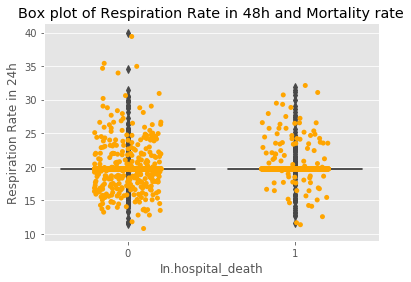

In [101]:
ax = sns.boxplot(x='In.hospital_death', y='Respiration Rate in 48h',data=dt)
ax = sns.stripplot(x='In.hospital_death', y='Respiration Rate in 24h', data=dt, color="orange", jitter=0.2)
plt.title('Box plot of Respiration Rate in 48h and Mortality rate')

poly1d([-0.00451881,  0.81854392])

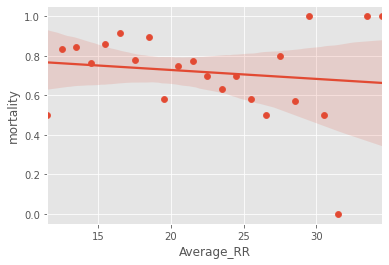

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from scipy import integrate
import warnings
plt.style.use('ggplot')
df = pd.read_csv('ProjectPreprocessed.ICU.data.csv',index_col='RecordID')
du=df[['Mean_RespRate.x','Mean_RespRate.y','Mean_HR.x','Mean_HR.y','Mean_Albumin.x','Mean_Albumin.y','Mean_GCS.x','Mean_GCS.y','Mean_Temp.x','Mean_Temp.y','In.hospital_death']]
dx = du.rename(columns = {'Mean_RespRate.x': 'Respiration Rate in 24h',
                          'Mean_RespRate.y': 'Respiration Rate in 48h',
                          'Mean_HR.x': 'Heart Rate in 24h',
                          'Mean_HR.y': 'Heart Rate in 48h',
                          'Mean_Albumin.x': 'Albumin in 24h',
                          'Mean_Albumin.y': 'Albumin in 48h',
                          'Mean_GCS.x': 'GCS in 24h',
                          'Mean_GCS.y': 'GCS in 48h',
                          'Mean_Temp.x': 'Body temp in 24h',
                          'Mean_Temp.y': 'Body temp in 48h',
                          'In.hospital_death':'In.hospital_death'})
dt=dx.drop(['Albumin in 24h'], axis = 1)
dt1=dt.pivot_table(index='RecordID', values=['Respiration Rate in 24h',
                'In.hospital_death']).round()
dt1['Respiration Rate in 24h']=dt1['Respiration Rate in 24h'].astype("float32")
dt1['cut']=pd.cut(dt1['Respiration Rate in 24h'],bins=[i for i in range(int(dt1['Respiration Rate in 24h'].min())
                                                                  ,int(dt1['Respiration Rate in 24h']
                                                                 .max()),1)])
totle_count=pd.DataFrame(dt1.groupby('cut')['In.hospital_death'].count())
totle_count.columns=['In.hospital_death_total']
totle_1_count=pd.DataFrame(dt1.groupby('cut')['In.hospital_death'].sum())
totle_1_count.columns=['In.hospital_death_total_1']
result=pd.concat([totle_count,totle_1_count],axis=1)
result['In.hospital_death_total_0']=result['In.hospital_death_total']-result['In.hospital_death_total_1']
result=result[result['In.hospital_death_total']>0].reset_index()
result['mortality']=result['In.hospital_death_total_0']/result['In.hospital_death_total']
result['Average_RR']=result['cut'].map(lambda x:str(str(x)).split(',')[-1].split(']')[0])
result['Average_RR']=result['Average_RR'].astype('float32')-0.5

sns.scatterplot(data=result, x='Average_RR', y='mortality')
sns.regplot(data=result, x='Average_RR', y='mortality');
p1 = np.poly1d(np.polyfit(result['Average_RR'], result['mortality'],1))
p1

### 4. Body Temperature


The temperature with the highest survival and death rates is between 36 to 38 degrees. From the counts we can tell that there are more dead patients than surviving patients.

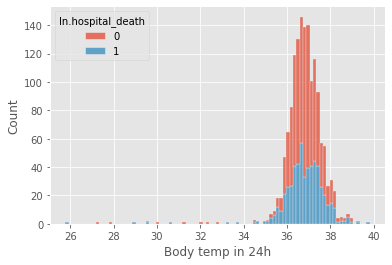

In [122]:
sns.histplot(data=dt, x='Body temp in 24h', hue='In.hospital_death',multiple='stack')

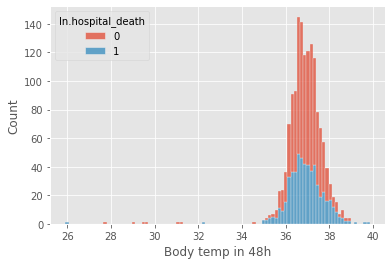

In [123]:
sns.histplot(data=dt, x='Body temp in 48h', hue='In.hospital_death',multiple='stack')

poly1d([-0.01904032,  1.22127564])

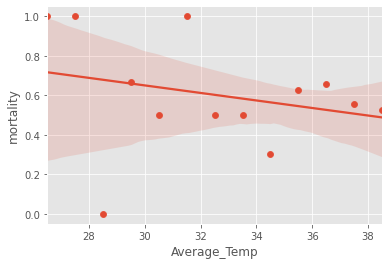

In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from scipy import integrate
import warnings
plt.style.use('ggplot')
df = pd.read_csv('ProjectPreprocessed.ICU.data.csv',index_col='RecordID')
du=df[['Mean_RespRate.x','Mean_RespRate.y','Mean_HR.x','Mean_HR.y','Mean_Albumin.x','Mean_Albumin.y','Mean_GCS.x','Mean_GCS.y','Mean_Temp.x','Mean_Temp.y','In.hospital_death']]
dx = du.rename(columns = {'Mean_RespRate.x': 'Respiration Rate in 24h',
                          'Mean_RespRate.y': 'Respiration Rate in 48h',
                          'Mean_HR.x': 'Heart Rate in 24h',
                          'Mean_HR.y': 'Heart Rate in 48h',
                          'Mean_Albumin.x': 'Albumin in 24h',
                          'Mean_Albumin.y': 'Albumin in 48h',
                          'Mean_GCS.x': 'GCS in 24h',
                          'Mean_GCS.y': 'GCS in 48h',
                          'Mean_Temp.x': 'Body temp in 24h',
                          'Mean_Temp.y': 'Body temp in 48h',
                          'In.hospital_death':'In.hospital_death'})
dt=dx.drop(['Albumin in 24h'], axis = 1)
dt1=dt.pivot_table(index='RecordID', values=['Body temp in 24h',
                'In.hospital_death']).round()
dt1['Body temp in 24h']=dt1['Body temp in 24h'].astype("float32")
dt1['cut']=pd.cut(dt1['Body temp in 24h'],bins=[i for i in range(int(dt1['Body temp in 24h'].min())
                                                                  ,int(dt1['Body temp in 24h']
                                                                 .max()),1)])
totle_count=pd.DataFrame(dt1.groupby('cut')['In.hospital_death'].count())
totle_count.columns=['In.hospital_death_total']
totle_1_count=pd.DataFrame(dt1.groupby('cut')['In.hospital_death'].sum())
totle_1_count.columns=['In.hospital_death_total_1']
result=pd.concat([totle_count,totle_1_count],axis=1)
result['In.hospital_death_total_0']=result['In.hospital_death_total']-result['In.hospital_death_total_1']
result=result[result['In.hospital_death_total']>0].reset_index()
result['mortality']=result['In.hospital_death_total_0']/result['In.hospital_death_total']
result['Average_Temp']=result['cut'].map(lambda x:str(str(x)).split(',')[-1].split(']')[0])
result['Average_Temp']=result['Average_Temp'].astype('float32')-0.5

sns.scatterplot(data=result, x='Average_Temp', y='mortality')
sns.regplot(data=result, x='Average_Temp', y='mortality');
p1 = np.poly1d(np.polyfit(result['Average_Temp'], result['mortality'],1))
p1

### 5. Albumin
We decided to use a histogram and the joined scatter plot as it was the only plot that showed the relationship between albumin content and patients' mortality

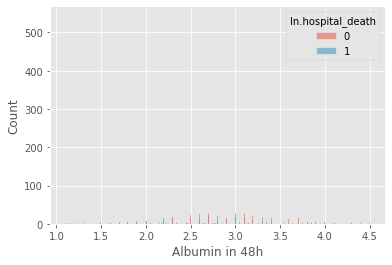

In [114]:
sns.histplot(data=dt, x='Albumin in 48h', hue='In.hospital_death')

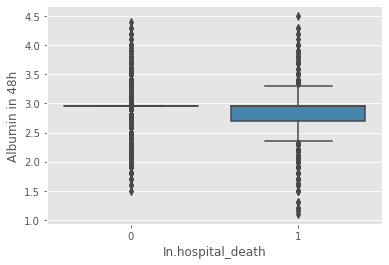

In [144]:
sns.boxplot(data=dt,x='In.hospital_death',y='Albumin in 48h')

poly1d([0.17459724, 0.21755619])

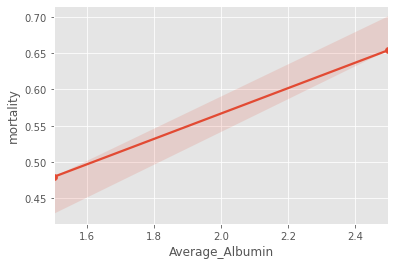

In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from scipy import integrate
import warnings
plt.style.use('ggplot')
df = pd.read_csv('ProjectPreprocessed.ICU.data.csv',index_col='RecordID')
du=df[['Mean_RespRate.x','Mean_RespRate.y','Mean_HR.x','Mean_HR.y','Mean_Albumin.x','Mean_Albumin.y','Mean_GCS.x','Mean_GCS.y','Mean_Temp.x','Mean_Temp.y','In.hospital_death']]
dx = du.rename(columns = {'Mean_RespRate.x': 'Respiration Rate in 24h',
                          'Mean_RespRate.y': 'Respiration Rate in 48h',
                          'Mean_HR.x': 'Heart Rate in 24h',
                          'Mean_HR.y': 'Heart Rate in 48h',
                          'Mean_Albumin.x': 'Albumin in 24h',
                          'Mean_Albumin.y': 'Albumin in 48h',
                          'Mean_GCS.x': 'GCS in 24h',
                          'Mean_GCS.y': 'GCS in 48h',
                          'Mean_Temp.x': 'Body temp in 24h',
                          'Mean_Temp.y': 'Body temp in 48h',
                          'In.hospital_death':'In.hospital_death'})
dt=dx.drop(['Albumin in 24h'], axis = 1)
dt1=dt.pivot_table(index='RecordID', values=['Albumin in 48h',
                'In.hospital_death']).round()
dt1['Albumin in 48h']=dt1['Albumin in 48h'].astype("float32")
dt1['cut']=pd.cut(dt1['Albumin in 48h'],bins=[i for i in range(int(dt1['Albumin in 48h'].min())
                                                                  ,int(dt1['Albumin in 48h']
                                                                 .max()),1)])
totle_count=pd.DataFrame(dt1.groupby('cut')['In.hospital_death'].count())
totle_count.columns=['In.hospital_death_total']
totle_1_count=pd.DataFrame(dt1.groupby('cut')['In.hospital_death'].sum())
totle_1_count.columns=['In.hospital_death_total_1']
result=pd.concat([totle_count,totle_1_count],axis=1)
result['In.hospital_death_total_0']=result['In.hospital_death_total']-result['In.hospital_death_total_1']
result=result[result['In.hospital_death_total']>0].reset_index()
result['mortality']=result['In.hospital_death_total_0']/result['In.hospital_death_total']
result['Average_Albumin']=result['cut'].map(lambda x:str(str(x)).split(',')[-1].split(']')[0])
result['Average_Albumin']=result['Average_Albumin'].astype('float32')-0.5

sns.scatterplot(data=result, x='Average_Albumin', y='mortality')
sns.regplot(data=result, x='Average_Albumin', y='mortality');
p1 = np.poly1d(np.polyfit(result['Average_Albumin'], result['mortality'],1))
p1

## Data Modelling
The mortality rate of the patient at the corresponding vital signs is estimated by averaging the mortality rate of each vital sign.

### Discussions

We developed this model by analyzing the vital signs of five important ICU patients.We can import data from the various vital signs of patients in the ICU into the model to calculate the estimated mortality rate of the patients.This greatly helps the hospital to predict the severity of the ICU patient's condition and the risk of death of the patient, which is very helpful to the rescue of the patient.

However, the model we built does not calculate the weight, but directly calculates the average value of the selected elements.Because different vital signs have different effects on the mortality rate of patients, which is more likely to be the result of multiple factors than a single factor, the method of using the average of different vital signs to calculate the mortality rate of patients will have errors.

Secondly, our model only considers the relatively important five elements selected in our exploration process, and the influence of other vital signs on patient mortality cannot be calculated by relying on this model. Therefore, this model still has errors in predicting the outcome of patient mortality.However, the advantage of this model is that we can modify the model at any time by adding qualified elements (elements that affect patient mortality) to make it more suitable for our purposes.


In [2]:
def heart_rate():
    print("heart_rate:")
    x=float(input())
    y=-0.004916*x+0.997
    return y
def albumin():
    print('albumin:')
    x=float(input())
    y=0.1533*x+0.1833
    return y
def Gcs():
    print("Gcs:")
    x=float(input())
    y=0.04148*x+0.2162
    return y
def Body_temperature():
    print("Body_temperature:")
    x=float(input())
    y=-0.01904*x+1.1221
    return y
def Respiration_rate():
    print("Respiration_rate:")
    x=float(input())
    y=-0.004519*x+0.8185
    return y
def cacl_mean():
    ouput=(heart_rate()+albumin()+Gcs()+Body_temperature()+Respiration_rate())/5
    return ouput

For example: If a patients' heart rate is at 100, albumin at 3, gcs at 10 ,body temperature at 38 and respiration rate at 27,we can get the mortality rate of this patient using this model.

In [3]:
cacl_mean()

heart_rate:
100
albumin:
3
Gcs:
10
Body_temperature:
38
Respiration_rate:
27


0.5749334000000001

## Conclusion

1. Heart rate：
Patients' overall mortality decreased as heart rate increased. And the relationship between patient mortality rate and heart rate satisfies this formula ‘y=-0.004916 x + 0.997’.


2. GCS:
Patients’overall mortality rate increases as albumin increases.And the relationship between patient mortality rate and albumin satisfies this formula ‘y=0.04148 x + 0.2162’.


3. Respiration Rate:
Patients’ overall mortality decreased as respiration rate increased. And the relation between the patient mortality rate and respiration rate satisfies this formula ‘y=-0.004519x+0.8185’.


4. Body Temperature：
Patients’ overall mortality decreased as body temperature increased. And the relation between the patient mortality rate and body temperature satisfies this formula ’y=-0.01904x+1.1221’.


5. Albumin:
Patients’overall mortality rate increases as albumin increases.And the relationship between patient mortality rate and albumin satisfies this formula ‘y=0.1533x + 0.1833’.



### Contributions
Yunru Zhu (30930448): 
    Aim,
    Background,
    Method,
    Data analysis (heart rate),
    Conclusion (heart rate),
    Modelling.

Lingyi Zhang (31113141):
    Background,
    Data analysis (GCS, albumin),
    Conclusion (GCS, albumin),
    Discussion.

Chenyi Zheng (32556047):
    Background,
    Data analysis (Respiration rate, body temperature),
    Conclusion (Respiration rate, body temperature).

Daniel Korolov (32516134):
    Background,
    Data analysis(GCS).

Stephanie Wainaina (32558937):
    Background,
    Exploratory Data,
    Data analysis(Respiration Rate),
    Data Preparation.

## References
Ding, X., Billari, F. C., & Gietel-Basten, S. (2017). Health of midlife and older adults in China: the role of regional economic development, inequality, and institutional setting. International journal of public health, 62(8), 857-867.

Fuster, V., Wayne, A. R., O'Rouke, R. A.2001. Hurst's The Heart 10th International. New York: McGraw-Hill. ISBN 978-0071162968. OCLC 49034333

Seccareccia, F., Pannozzo, F., Dima, F., Minoprio, A., Menditto, A., Lo Noce, C., & Giampaoli, S. 2001. Heart rate as a predictor of mortality: the MATISS project. American journal of public health, 91(8), 1258-1263.

Reunanen, A., Karjalainen, J., Ristola, P., Heliövaara, M., Knekt, P., & Aromaa, A. 2000. Heart rate and mortality. Journal of internal medicine, 247(2), 231-239.

Rhoads, M. K., Goleva, S. B., Beierwaltes, W. H., & Osborn, J. L. (2017). Renal vascular and glomerular pathologies associated with spontaneous hypertension in the nonhuman primate Chlorocebus aethiops sabaeus. American Journal of Physiology-Regulatory, Integrative and Comparative Physiology, 313(3), R211-R218.

Macedo, L. G., Kosmidou, I., Crowley, A., Alu, M., Praz, F., Chen, S., ... & Kodali, S. (2018). Impact of Resting Heart Rate at 30 Days Following Transcatheter or Surgical Aortic Valve Replacement and Cardiovascular Outcomes: Insights from The PARTNER 2 Trial. Structural Heart, 2(5), 441-447.

Valika, A., Paprockas, K., Villines, D., & Costanzo, M. R. (2018). Importance of baseline heart rate as a predictor of cardiac functional recovery in newly diagnosed heart failure with reduced ejection fraction. Clinical cardiology, 41(6), 752-757.


Albumin blood test. (n.d.-a). Retrieved May 23, 2021, from https://medlineplus.gov/lab-tests/albumin-blood-test

Coventry, M. E. (2012). Critical care: the eight vital signs of patient monitoring. British Journal of Nursing,Vol 21, No 10,5.
Dix, A. (2018). Respiratory rate: the benefits of continuous monitoring. Nursing Times[online]: 114: 11, 36-37.

Eric Kipnis, D. R. (2012). "Monitoring in the Intensive Care". Critical Care Research and Practice, vol. 2012, 20 pages.

James S. Shahoud, T. S. (2021). Physiology, Arterial Pressure Regulation. StatPearls Publishing LLC.

Jevon P, E. B. (2012). Monitoring the critically ill patient. 3rd ed. Londres: Wiley-Blackwell.

physio-pedia. (n.d.). https://www.physio-pedia.com/Monitoring_of_Patients_in_the_ICU. Retrieved from https://www.physio-pedia.com: Monitoring_of_Patients_in_the_ICU

Sebastiano Mercadante, C. G. (2018). care in intensive care units: why, where, what, who, when, how. BMC Anesthesiol, 106.

VetFolio. (n.d.). Retrieved May 25, 2021, from https://www.vetfolio.com/learn/article/the-role-of-albumin-and-fluids-in-the-body

Body temperature. (2020, February 26). Michigan Medicine. https://www.uofmhealth.org/health-library/hw198785   

Maintaining a constant body temperature . (2021). BBC Bitesize.  https://www.bbc.co.uk/bitesize/guides/zqdg7p3/revision/4 